In [57]:
import igraph as igraph
import matplotlib.pyplot as plt
import numpy as np

## Step 01 Generating and visualizing the graph

In [35]:
num_nodes=100
num_edges=200
graph =igraph.Graph.Erdos_Renyi(n=num_nodes, m=num_edges) # Generating random unweighted undirected graph 

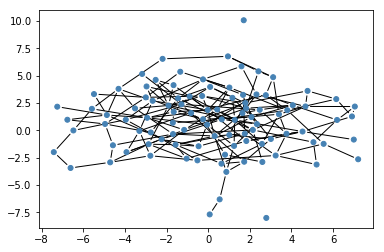

In [36]:
#Plotting the generated graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
igraph.plot(graph, target=ax)

In [37]:
# printing first 4 rows of both Adjancey Matrix and Adjacency List
adj = graph.get_adjacency()
print("adjacency matrix \n", adj[:4])
adjlist= graph.get_adjlist()
print("adjacency list \n", adjlist[:4])

adjacency matrix 
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

## Step 02

### Depth-first search to find connected components of the graph

In [46]:
# Following function is not implemented by me, instead it is from https://cppsecrets.com/users/5629115104105118971091101011031055657495564103109971051084699111109/Python-Connected-Components-in-Graph.php
# Define a boolian list to save for each node weither it was visited or not 
# Intializing the list, all nodes were not visited already.
visited = [False for i in range(num_nodes+1)]          
# Defining a list to save all the found connected components,
# each element of this list contain a list of connected component with each other
# different elements of this list are not connected with each other
all_components = []
# Define a function to apply DFS starting from a certain node,
# While visiting the nodes, the nodes passed by are being saved
def dfs(node, component):                              
    # Marking node as visited.
    visited[node] = True
    # appending node in the component list
    component.append(node)
    # visiting neighbours of the current node
    for neighbour in adjlist[node]:
        # if the node is not visited then we call dfs on that node.
        if visited[neighbour] == False:
            dfs(neighbour, component)

# for each node, we check if it is not already visited, we visit it through the defined dfs function
for i in range(num_nodes):
    if visited[i] == False:
        # defining a list to save the connected componontes with each other starting from current node
        component = []
        dfs(i, component)
        # after finding the connected compononets to the current node, the list of them is added to 
        all_components.append(component) # keep tracking all the components 'all_components'list

print ("Number of seperate connected componontes is: "+ str(len(all_components)))
print("The found connected componontes: ")
print(all_components)
print("The connected componontes found by the in-built function of igraph:") 
graph_components=graph.components()
print(graph_components)
print("Comparing all results:")
print ("Are the number of connected components equal both ways:"+ ('Yes' if (len(all_components)==len(graph_components)) else 'No'))
if (len(all_components)==len(graph_components)):
    for i in range (len(all_components)):
        print (str(i+1)+"th components identical? "+ ('Yes' if (sorted(all_components[i])==sorted(graph_components[i])) else 'No'))


Number of seperate connected componontes is: 3
The found connected componontes: 
[[0, 24, 57, 3, 17, 16, 11, 25, 37, 79, 4, 5, 6, 31, 43, 62, 40, 10, 28, 2, 12, 13, 47, 32, 72, 18, 26, 54, 8, 19, 38, 53, 90, 39, 66, 51, 14, 27, 46, 69, 20, 49, 34, 29, 89, 61, 7, 1, 35, 21, 95, 67, 56, 81, 91, 97, 99, 84, 52, 88, 96, 98, 44, 60, 65, 87, 30, 48, 41, 80, 58, 45, 64, 23, 68, 94, 76, 93, 73, 42, 92, 50, 83, 33, 77, 85, 36, 22, 71, 59, 86, 63, 9, 75, 70, 82, 55, 74], [15], [78]]
The connected componontes found by the in-built function of igraph:
Clustering with 100 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
    22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
    58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
    76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
    95, 96, 97, 98, 99
[1] 1

### Breadthfirst search to find a shortest path between two random vertices

In [62]:
#Defining a function to find shortest path between 2 nodes applying BFS algorithm
def bfs_shortest_path(adjlist, source, dest):
    # Defining a queue to save the found path
    queue = []
    # define a set to mark the visited nodes
    visited = set()
    # adding the source for the path queue and mark it as visited
    queue.append([source])
    visited.add(source)
    # loop as long as the queue of path is not empty (initially it has the source node)
    while queue:
        # checking if the last node in the path is the destination node,
        #  then the path is found and we return it
        path = queue.pop(0)
        node = path[-1]
        if node == dest:
            return path
        # else, checking the neighboors of the current node are not marked visited already
        for adjacent in adjlist[node]:
            if adjacent not in visited:
                # is so then, we mark each unvisited adjacent node as visited
                # and we update the path adding the new node to it 
                visited.add(adjacent)
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
    return queue
# Trying different source, destination
print ("Path between 15 and 5 :")
path=bfs_shortest_path(adjlist,15,5)
print('No path found between two nodes' if (len(path)==0) else ("length of shortest path: "+str(len(path)) + " path: "+ str(path)))
print ("Path between 20 and 95 :")
path=bfs_shortest_path(adjlist,20,95)
print('No path found between two nodes' if (len(path)==0) else ("length of shortest path: "+str(len(path)) + ", path: "+ str(path)))


Path between 15 and 5 :
No path found between two nodes
Path between 20 and 95 :
length of shortest path: 5, path: [20, 61, 81, 62, 95]
